### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : ethereum_dataset.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [9]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/ethereum_dataset.csv', parse_dates = ['Date(UTC)'])
df1.head()

,Date(UTC),UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_chaindatasize,eth_ens_register
0,2015-07-30,1438214400,0.0,8893,9205,7.204931e+07,0.0,23.7569,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN,NaN
1,2015-07-31,1438300800,0.0,0,9361,7.208550e+07,0.0,48.1584,0.603,6863,511,582,12.58,0,0,0,36191.71875,NaN,NaN
2,2015-08-01,1438387200,0.0,0,9476,7.211320e+07,0.0,55.2709,0.887,5293,334,575,16.34,0,0,0,27705.93750,NaN,NaN
3,2015-08-02,1438473600,0.0,0,9563,7.214143e+07,0.0,64.1779,1.020,5358,394,581,16.12,0,0,0,28223.43750,NaN,NaN
4,2015-08-03,1438560000,0.0,0,9639,7.216940e+07,0.0,69.8559,1.126,5280,443,587,16.37,0,0,0,27976.71875,NaN,NaN


In [7]:
# df1.rename(columns={
#             'eth_etherprice' : 'etherprice', 
#             'eth_tx' : 'tx',
#             'eth_address' : 'address',
#             'eth_supply' : 'supply', 
#             'eth_marketcap' : 'marketcap', 
#             'eth_hashrate' : 'hashrate', 
#             'eth_difficulty' : 'difficulty', 
#             'eth_blocks' : 'blocks', 
#             'eth_uncles' : 'uncles', 
#             'eth_blocksize' : 'blocksize' 
#             }, inplace = True )

In [12]:
type(df1['Date(UTC)'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# Set Date as it's index
df1.set_index('Date(UTC)', inplace = True )

In [15]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 769 entries, 2015-07-30 to 2017-09-05
Data columns (total 18 columns):
UnixTimeStamp        769 non-null int64
eth_etherprice       769 non-null float64
eth_tx               769 non-null int64
eth_address          769 non-null int64
eth_supply           769 non-null float64
eth_marketcap        769 non-null float64
eth_hashrate         769 non-null float64
eth_difficulty       769 non-null float64
eth_blocks           769 non-null int64
eth_uncles           769 non-null int64
eth_blocksize        769 non-null int64
eth_blocktime        769 non-null float64
eth_gasprice         769 non-null int64
eth_gaslimit         769 non-null int64
eth_gasused          769 non-null int64
eth_ethersupply      769 non-null float64
eth_chaindatasize    0 non-null float64
eth_ens_register     125 non-null float64
dtypes: float64(9), int64(9)
memory usage: 114.1 KB


- The data frame has 769 entries and 18 columns. 
- there is no data in eth_chaindatasize
- eth_ens_register only has 125 data
- All data in number

#### 2. Cleaning Data (Deal with Missing Data)

Problem :
- There are missing data 

Solution:
- There is no information regarding chaindatasize at all, so I decided to drop the column
- I let null for eth_ens_register

In [18]:
#drop chaindatasize column
df1.drop(['eth_chaindatasize'], inplace=True, axis=1)
df1.head()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
Date(UTC),,,,,,,,,,,,,,,,,
2015-07-30,1438214400,0.0,8893,9205,7.204931e+07,0.0,23.7569,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN
2015-07-31,1438300800,0.0,0,9361,7.208550e+07,0.0,48.1584,0.603,6863,511,582,12.58,0,0,0,36191.71875,NaN
2015-08-01,1438387200,0.0,0,9476,7.211320e+07,0.0,55.2709,0.887,5293,334,575,16.34,0,0,0,27705.93750,NaN
2015-08-02,1438473600,0.0,0,9563,7.214143e+07,0.0,64.1779,1.020,5358,394,581,16.12,0,0,0,28223.43750,NaN
2015-08-03,1438560000,0.0,0,9639,7.216940e+07,0.0,69.8559,1.126,5280,443,587,16.37,0,0,0,27976.71875,NaN


#### 4. Statistic Description and Data  Visualization

In [20]:
df1.describe()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
count,7.690000e+02,769.000000,769.000000,7.690000e+02,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,7.690000e+02,7.690000e+02,7.690000e+02,769.000000,125.000000
mean,1.471392e+09,46.920806,70564.308192,1.050655e+06,8.320820e+07,4301.621649,13247.782131,233.619406,5517.196359,429.973992,2770.429129,15.707763,3.922550e+10,3.993699e+06,3.129846e+09,29182.658891,1301.024000
std,1.919250e+07,90.378356,89424.024060,1.521229e+06,6.753548e+06,8451.186405,22419.039496,455.312190,627.739112,160.668231,3457.027985,2.158544,5.545561e+10,1.285138e+06,4.580532e+09,3352.671936,839.253129
min,1.438214e+09,0.000000,0.000000,9.205000e+03,7.204931e+07,0.000000,23.756900,0.121000,3383.000000,126.000000,575.000000,4.460000,0.000000e+00,0.000000e+00,0.000000e+00,17380.937500,0.000000
25%,1.454803e+09,2.520000,17549.000000,5.892500e+04,7.715399e+07,193.763321,672.601500,11.176000,5046.000000,351.000000,1200.000000,14.160000,2.264193e+10,3.141700e+06,6.648190e+08,26694.531250,581.000000
50%,1.471392e+09,10.970000,42346.000000,5.394280e+05,8.308015e+07,921.391838,4362.965300,60.393000,5861.000000,403.000000,1531.000000,14.670000,2.394373e+10,4.012114e+06,1.362771e+09,30819.843750,1267.000000
75%,1.487981e+09,14.990000,58756.000000,1.081093e+06,8.922728e+07,1248.461400,10123.880000,142.922000,6035.000000,464.000000,2045.000000,16.890000,5.231352e+10,4.711458e+06,2.573096e+09,31808.593750,1971.000000
max,1.504570e+09,394.660000,444413.000000,7.067860e+06,9.445146e+07,36641.699754,95055.985800,2250.289000,6912.000000,2044.000000,19760.000000,25.530000,9.395883e+11,6.722669e+06,2.325272e+10,39316.093750,3863.000000


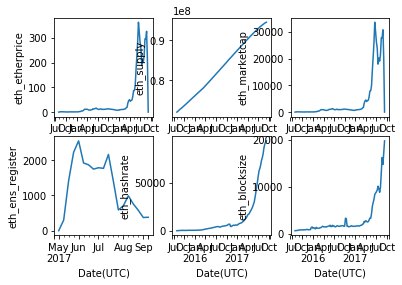

In [26]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('eth_etherprice')
df1.eth_etherprice.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('eth_supply')
df1.eth_supply.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('eth_marketcap')
df1.eth_marketcap.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('eth_ens_register')
df1.eth_ens_register.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('eth_hashrate')
df1.eth_hashrate.resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('eth_blocksize')
df1['eth_blocksize'].resample('W').mean().plot()